# Importing libraries and data¶

## Libraries and settings

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import lightgbm as lgb

# from utils import *

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['font.size'] = 15
random.seed(0)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# Importing data and overview

In [7]:
calendar_df = pd.read_csv('/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/calendar.csv', parse_dates=['date'])
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
# Extract money value
def extract_money(text):
    if isinstance(text, str):
        text = text.replace('$','')
        text = text.replace(',','')
        money = float(text.replace('$',''))
    else:
        money=text
    return money

In [10]:
# Calendar data
calendar_df['price'] = calendar_df['price'].apply(lambda x: extract_money(x))
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
calendar_df['available'] = calendar_df['available'].map({'t':1, 'f':0})
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [12]:
calendar_df['revenue'] = calendar_df['price']*calendar_df['available']
calendar_df.head()

,listing_id,date,available,price,revenue
0,241032,2016-01-04,1,85.0,85.0
1,241032,2016-01-05,1,85.0,85.0
2,241032,2016-01-06,0,NaN,NaN
3,241032,2016-01-07,0,NaN,NaN
4,241032,2016-01-08,0,NaN,NaN


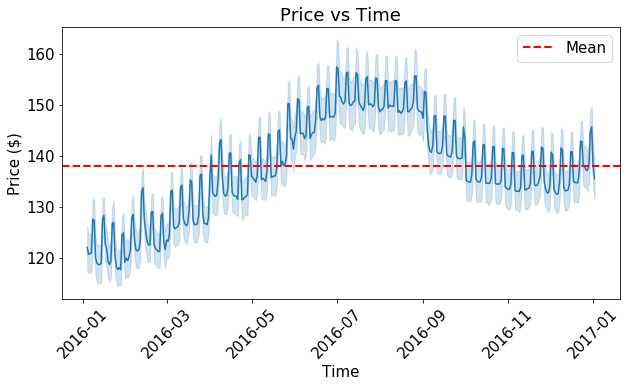

In [13]:
ax = sns.lineplot(x = "date", y = "price", 
                  markers = True, dashes = False, data = calendar_df)
plt.axhline(calendar_df['price'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.xticks(rotation = 45)
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend(loc='best')
plt.show()

<B><u>Observations:</u></B>

- All hosts are existing hosts: i.e. they have all joined before 2016
- The listing information is almost exactly one year (Jan-2016 to Jan-2019)
- The price is on average 140 USD. All the small peaks indicates the weekend period when both demands and price increase.
- The price becomes highest during summer, likely because this is holliday season.
- The price listed in listings dataframe is just the lowest price. Prices can be adjusted by the hosts, based on seasons

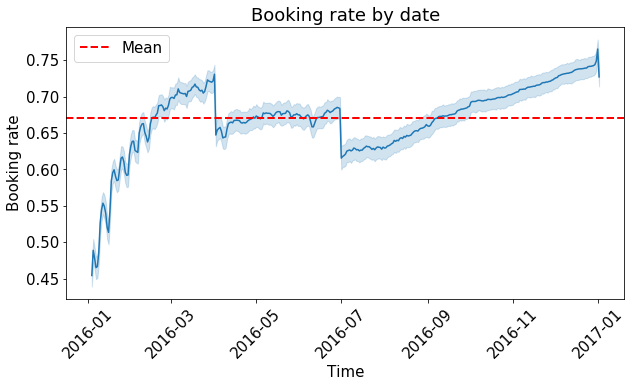

In [15]:
ax = sns.lineplot(x = "date", y = "available", 
                  markers = True, dashes = False, data = calendar_df)
plt.axhline(calendar_df['available'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.xticks(rotation = 45)
plt.title('Booking rate by date')
plt.xlabel('Time')
plt.ylabel('Booking rate')
plt.legend(loc='best')
plt.show()

<B><u>Observations:</u></B>

- Booking rate drop by April (Easter) and July (US Independence Day) where people mostly return and celebrate with family rather than travel
- Booking drop significantly at the beginning and at the end of the year, because of End Year Holliday.